## Data Prep CA1

### Contents
1. Introduction
2. Functions used
3. Results
4. Conclusion

### 1. Introduction

This assignment will investigate a dataset containing "APS Failure and Operational Data for Scania Trucks".

<b>1.1 Theory

PCA, dimensionality reduction. LASSO/Ridge Comparisons for dimensionality reduction (L1 v L2)? Coerrelation. Evaluating dimensionality reduction.




<b>1.2 Library Imports

The following libraries are used in this assignment.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import missingno as msno

from scipy import stats


from scipy.stats import linregress
from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

<b>1.3 Initial Dataset Load

The dataset used is of "APS Failure and Operational Data for Scania Trucks".

In [2]:
df = pd.read_csv("aps_failure_set.csv")

In [3]:
# showing all features
pd.set_option("display.max_columns", None)
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,120960

### 2. Selection of Functions Used

In [4]:
def prelim(df):
    print(f"Dataframe Shape: {df.shape} \n")
    print(f"Dataframe statistical information: \n{df.describe()} \n")
    print(f"Object datatype statistical information: \n{df.describe(include=object)} \n")
    print(f"Dataframe info function: \n{df.info()} \n")
    print(df.isnull().sum())

In [5]:
# function that views the missing values of the first x row's
def missing_values_vis(df, end_row, title="Missing Values Matrix"):
    subset_1 = df.iloc[:end_row, :85]
    subset_2 = df.iloc[:end_row, 85:]
    
    fig, axes = plt.subplots(2, 1, figsize=(20, 15))

    msno.matrix(subset_1, ax=axes[0], sparkline=False)
    axes[0].set_title('Subset 1: Missing Values in Features 1 - 84')

    axes[0].set_xticks(range(len(subset_1.columns)))
    axes[0].set_xticklabels(subset_1.columns, rotation=90)

    msno.matrix(subset_2, ax=axes[1], sparkline=False)
    axes[1].set_title('Subset 2: Missing Values in Features 85 - 171')

    axes[1].set_xticks(range(len(subset_2.columns)))
    axes[1].set_xticklabels(subset_2.columns, rotation=90)
    
    plt.suptitle(title, fontsize=20)

    plt.show()

In [6]:
# basic countplot
def countplot(df, var, x_size=4, y_size=4, title="Countplot", x_label="Values", y_label="Count",
             rotate_xticks=0):
    plt.figure(figsize=(x_size, y_size))
    sns.countplot(data=df, x=var)#, hue=var) hue thins the bars..
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=rotate_xticks)
    plt.title(title)
    plt.show()

In [7]:
def make_sparse_df(df):

    # make df, adding total entries now so it's at the start
    sparse_df = pd.DataFrame(columns=["total entries"])
    
    # total num of zeros
    total_zeros = df.eq(0).sum()
    sparse_df["total_zeros"] = total_zeros

    # total % of zeros
    zero_percentages = (total_zeros / len(df)) * 100
    sparse_df["zero_percentages"] = zero_percentages

    # total num of null
    total_null = df.isnull().sum()
    sparse_df["total_null"] = total_null

    # total % of null
    null_percentages = (total_null / len(df)) * 100
    sparse_df["null_percentages"] = null_percentages
    
    # 60000 for each row
    sparse_df["total entries"] = len(df)
    
    # total sparse %
    sparse_df["total_sparce_percent"] = sparse_df["zero_percentages"] + sparse_df["null_percentages"]
    
    # non sparse % (inverse of above)
    sparse_df["non_null_percentage"] = 100 - sparse_df["null_percentages"]
    
    sparse_df["percent of zero values from non null values"] = (sparse_df["total_zeros"]/ (len(df) - sparse_df["total_null"])) *100
    
    
    return sparse_df

In [8]:
def sparse_lr(df, x, y):
    plt.scatter(df[x], df[y], label='Data Points', color='b')

    slope, intercept, r_value, p_value, std_err = linregress(df[x], df[y])
    line = slope * df[x] + intercept

    plt.plot(df[x], line, label='Regression Line', color='r')

    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()

In [9]:
def sparse_bubble_plot(df, x="total_sparce_percent", y="percent of zero values from non null values",
                       s="null_percentages", c="zero_percentages", legend=True):

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x, y=y, size=s, sizes=(20, 200), hue=c, palette='viridis', alpha=0.5, legend=legend)

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"Bubble Plot")

    plt.show()

### 3. Results

<b>3.1 First EDA

Using pandas functions for summary statistics some things are noticed. There are 60000 entries and 171 features. 170 of the 171 columns are categories.

In this case, the pandas head and describe functions both reveal something about the dataset. While some of the features explored seem numerical, they have values of "na".

In [10]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,120960

In [11]:
prelim(df)

Dataframe Shape: (60000, 171) 

Dataframe statistical information: 
             aa_000
count  6.000000e+04
mean   5.933650e+04
std    1.454301e+05
min    0.000000e+00
25%    8.340000e+02
50%    3.077600e+04
75%    4.866800e+04
max    2.746564e+06 

Object datatype statistical information: 
        class ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002 ag_003  \
count   60000  60000  60000  60000  60000  60000  60000  60000  60000  60000   
unique      2     30   2062   1887    334    419    155    618   2423   7880   
top       neg     na      0     na      0      0      0      0      0      0   
freq    59000  46329   8752  14861  55543  55476  59133  58587  56181  46894   

       ag_004 ag_005 ag_006 ag_007 ag_008 ag_009 ah_000 ai_000 aj_000 ak_000  \
count   60000  60000  60000  60000  60000  60000  60000  60000  60000  60000   
unique  23072  40798  40616  32126  18933   5356  43572   4056    895    160   
top         0      0      0      0      0      0     na      0     

<b>3.2 Setting null values

A quick way to remedy this is to reload the dataset setting "na" as a null value. By default, Pandas does not include "na" as a null value*, and this can be added with the na_values function.

**pandas documentation https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html*

In [12]:
df = pd.read_csv("aps_failure_set.csv", na_values="na")

In [13]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,13064

<b>3.3 Second EDA

Now when the same statistical function is performed only one feature remains categorical, and the other features have been automatically loaded as numerical.

In [14]:
prelim(df)

Dataframe Shape: (60000, 171) 

Dataframe statistical information: 
             aa_000        ab_000        ac_000        ad_000        ae_000  \
count  6.000000e+04  13671.000000  5.666500e+04  4.513900e+04  57500.000000   
mean   5.933650e+04      0.713189  3.560143e+08  1.906206e+05      6.819130   
std    1.454301e+05      3.478962  7.948749e+08  4.040441e+07    161.543373   
min    0.000000e+00      0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    8.340000e+02      0.000000  1.600000e+01  2.400000e+01      0.000000   
50%    3.077600e+04      0.000000  1.520000e+02  1.260000e+02      0.000000   
75%    4.866800e+04      0.000000  9.640000e+02  4.300000e+02      0.000000   
max    2.746564e+06    204.000000  2.130707e+09  8.584298e+09  21050.000000   

             af_000        ag_000        ag_001        ag_002        ag_003  \
count  57500.000000  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04   
mean      11.006817  2.216364e+02  9.757223e+02  8.606015e+03 

<b>Statistical Analysis

Investigate differences in figures.. There should be some things to look at here... some features have the majority of their values 0 etc. (sparse data)

<b>Categorical Features

<b> Class variable

The class variable is the only categorical variable left in the dataset. It is a binary category with two values; "neg" and "pos". It has no missing data and it is unbalanced.

At this stage the class variable is encoded; 1 for 'pos', 0 for 'neg'.

In [15]:
df["class"].isnull().sum()

0

In [16]:
df["class"].value_counts()

class
neg    59000
pos     1000
Name: count, dtype: int64

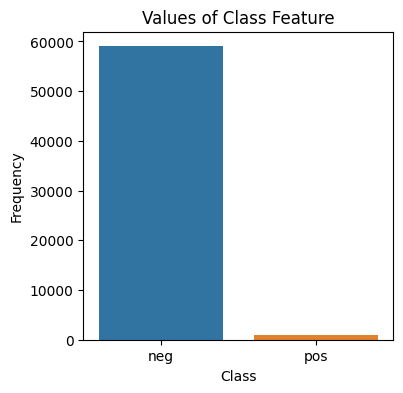

In [17]:
countplot(df, "class", title="Values of Class Feature",
         x_label="Class", y_label="Frequency")

In [18]:
#mapping = {'neg': 0, 'pos': 1}
#df['class'] = df['class'].map(mapping)

<b> Numerical Features

<b> Range

The range of the variables is one measure of spread.

The selection of quantative features shown with the head function all have a min value of 0, some have an innerquartile range of 0 meaning the majority of the data is sparse. There seems to be large outliers within the data.

The head function could be transposed to view the information for all the dataset, but it would leave 170 rows of variables to analyse. Instead, visualisation could be used to give a clearer image of the data.

First the minimum and maximum values of each feature is shown. It confirms that for most features, apart from 2 (which have minimums of 172 and 1209600), have a minimum of 0, which also shows that all numerical values are positive in the dataset.

The maximum values are harder to make a statement on after printing them, and for this it seems visualisation would give a clearer image of the data. They have values ranging from 2 to 8 billion. For most features the range is the maximum value, as 0 is their lowest. So instead of a plot of the maximum values, a plot of binned ranges is shown.

Although, the binned plot of ranges we are also looking at a graph of the maximum values, given that the two values with non 0 minimums wouldn't change bins with the criteria used.

The data has large outliers that will need scaled for modelling.

In [19]:
min_values = np.min(df.iloc[:, 1:], axis=0)
max_values = np.max(df.iloc[:, 1:], axis=0)

min_max_df = np.vstack((min_values, max_values))

In [20]:
min_max_df

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [21]:
min_df = pd.DataFrame(min_values, columns=["min_values"])
max_df = pd.DataFrame(max_values, columns=["max_values"])

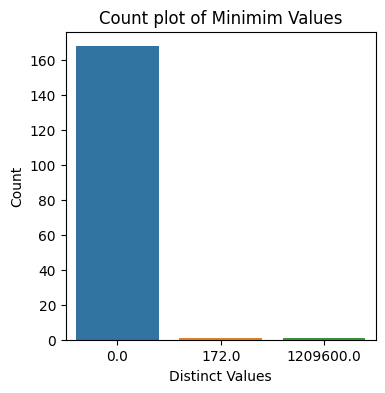

In [22]:
countplot(min_df, "min_values", title="Count plot of Minimim Values",
         x_label="Distinct Values")

In [23]:
range_df = max_values - min_values
range_df = pd.DataFrame(range_df, columns=["feature_range"])

In [24]:
# right is set to false so these will be the edges of the bins
bin_edges = [0, 1000, 10000, 100000, 1000000, 10000000, 100000000, 500000000, 1000000000, float('inf')]

# bin labels
bin_labels = ["0 - 1000", "1001 - 10,000", "10,001 - 100,000", "100,000 - 1 million", "1 million - 10 million", 
              "10 million - 100 million", "100 million - 500 million", "500 million - 1 billion", "1 billion - 8 billion"]  

range_df['bins'] = pd.cut(range_df["feature_range"], bins=bin_edges, labels=bin_labels, right=False)
   

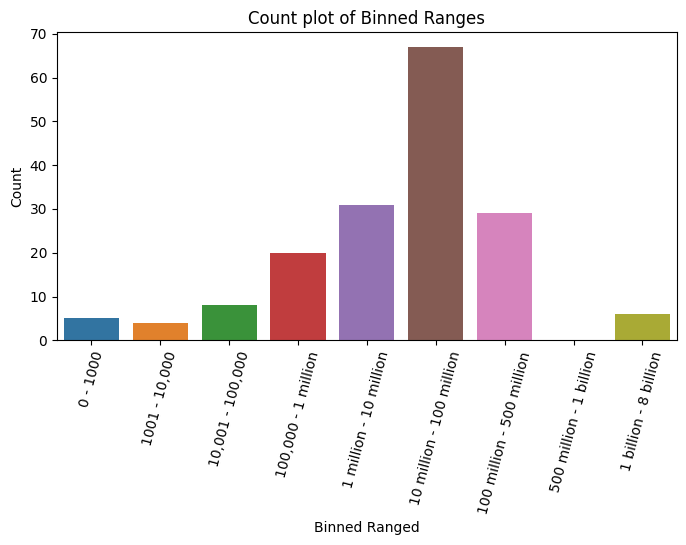

In [25]:
countplot(range_df, "bins", title="Count plot of Binned Ranges",
         x_label="Binned Ranged", x_size=8, rotate_xticks=75)

<b>Inner Quartile Range

The innerquartile range (IQR) is a useful measure of spread of a variable. It is less susceptable to extreme values than the range (Spiegelhalter, p. 49). Using pandas head function above showed many columns with an IQR of 0.

Features with IQR of 0 vs. Features with Non-zero IQR can be plotted to give an idea of how prevelant an IQR of 0 is in the dataset, and below it can be seen that 36.8% of columns have an IQR of 0.

The data is fairly sparse and it's possible that the outliers are associated with certain failures, or vice-versa.

In [26]:
df1 = df.drop("class", axis=1)
iqr = df1.quantile(0.75) - df1.quantile(0.25)


features_with_iqr_zero = iqr[iqr == 0].index
df_iqr_zero = df[features_with_iqr_zero]

df_iqr_non_zero = df.drop(columns=features_with_iqr_zero)

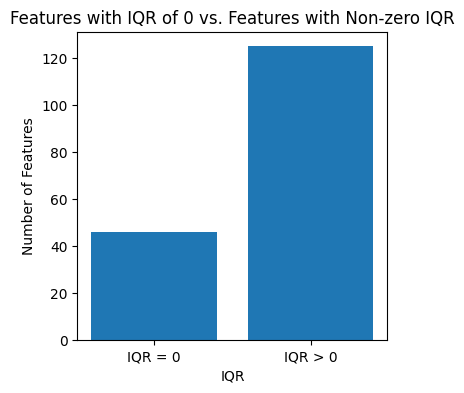

In [27]:
plt.figure(figsize=(4, 4))
plt.bar(['IQR = 0', 'IQR > 0'], [len(df_iqr_zero.columns), len(df_iqr_non_zero.columns)])

plt.xlabel('IQR')
plt.ylabel('Number of Features')
plt.title('Features with IQR of 0 vs. Features with Non-zero IQR')
plt.show()

In [28]:
len(df_iqr_zero.columns)

46

In [29]:
len(df_iqr_non_zero.columns)

125

In [30]:
print(f"Percentage of 0 IQR features: {len(df_iqr_zero.columns)/len(df_iqr_non_zero.columns)*100}")

Percentage of 0 IQR features: 36.8


<b>Feature Distributions

Look at the distributions of the features. Possibly with plot with tabs or just a selection of tabs

<b>Percentage of sparse data

The data is considerable sparse, with over one third of the features with an IQR of 0.



In [31]:
sparse_df = make_sparse_df(df)
sparse_df.head()

,total entries,total_zeros,zero_percentages,total_null,null_percentages,total_sparce_percent,non_null_percentage,percent of zero values from non null values
class,60000,0,0.000000,0,0.000000,0.000000,100.000000,0.000000
aa_000,60000,393,0.655000,0,0.000000,0.655000,100.000000,0.655000
ab_000,60000,10977,18.295000,46329,77.215000,95.510000,22.785000,80.294053
ac_000,60000,8752,14.586667,3335,5.558333,20.145000,94.441667,15.445160
ad_000,60000,2009,3.348333,14861,24.768333,28.116667,75.231667,4.450697


In [32]:
sparse_df.corr()

,total entries,total_zeros,zero_percentages,total_null,null_percentages,total_sparce_percent,non_null_percentage,percent of zero values from non null values
total entries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_zeros,NaN,1.000000,1.000000,-0.150181,-0.150181,0.899385,0.150181,0.977641
zero_percentages,NaN,1.000000,1.000000,-0.150181,-0.150181,0.899385,0.150181,0.977641
total_null,NaN,-0.150181,-0.150181,1.000000,1.000000,0.297128,-1.000000,-0.011154
null_percentages,NaN,-0.150181,-0.150181,1.000000,1.000000,0.297128,-1.000000,-0.011154
total_sparce_percent,NaN,0.899385,0.899385,0.297128,0.297128,1.000000,-0.297128,0.939265
non_null_percentage,NaN,0.150181,0.150181,-1.000000,-1.000000,-0.297128,1.000000,0.011154
percent of zero values from non null values,NaN,0.977641,0.977641,-0.011154,-0.011154,0.939265,0.011154,1.000000


<b>Missing Values

Now that the "na" values are correctly recognised as missing values they can be visualised.

Below a matrix of missing values is shown using the Missingno library, with white horizontal bands showing rows with groupings of missing data and vertical bars indicating features with missing data (slighter vertical bars indicate a separation of features).

Missingno matrix can be hard to interpid with a lot of data, and by limiting the data viewed patterns emerge.This indicates non random missing data (Harrison, 2019). Given that this dataset is of APS failure data, the bands or patterns could be related to specific failure types.

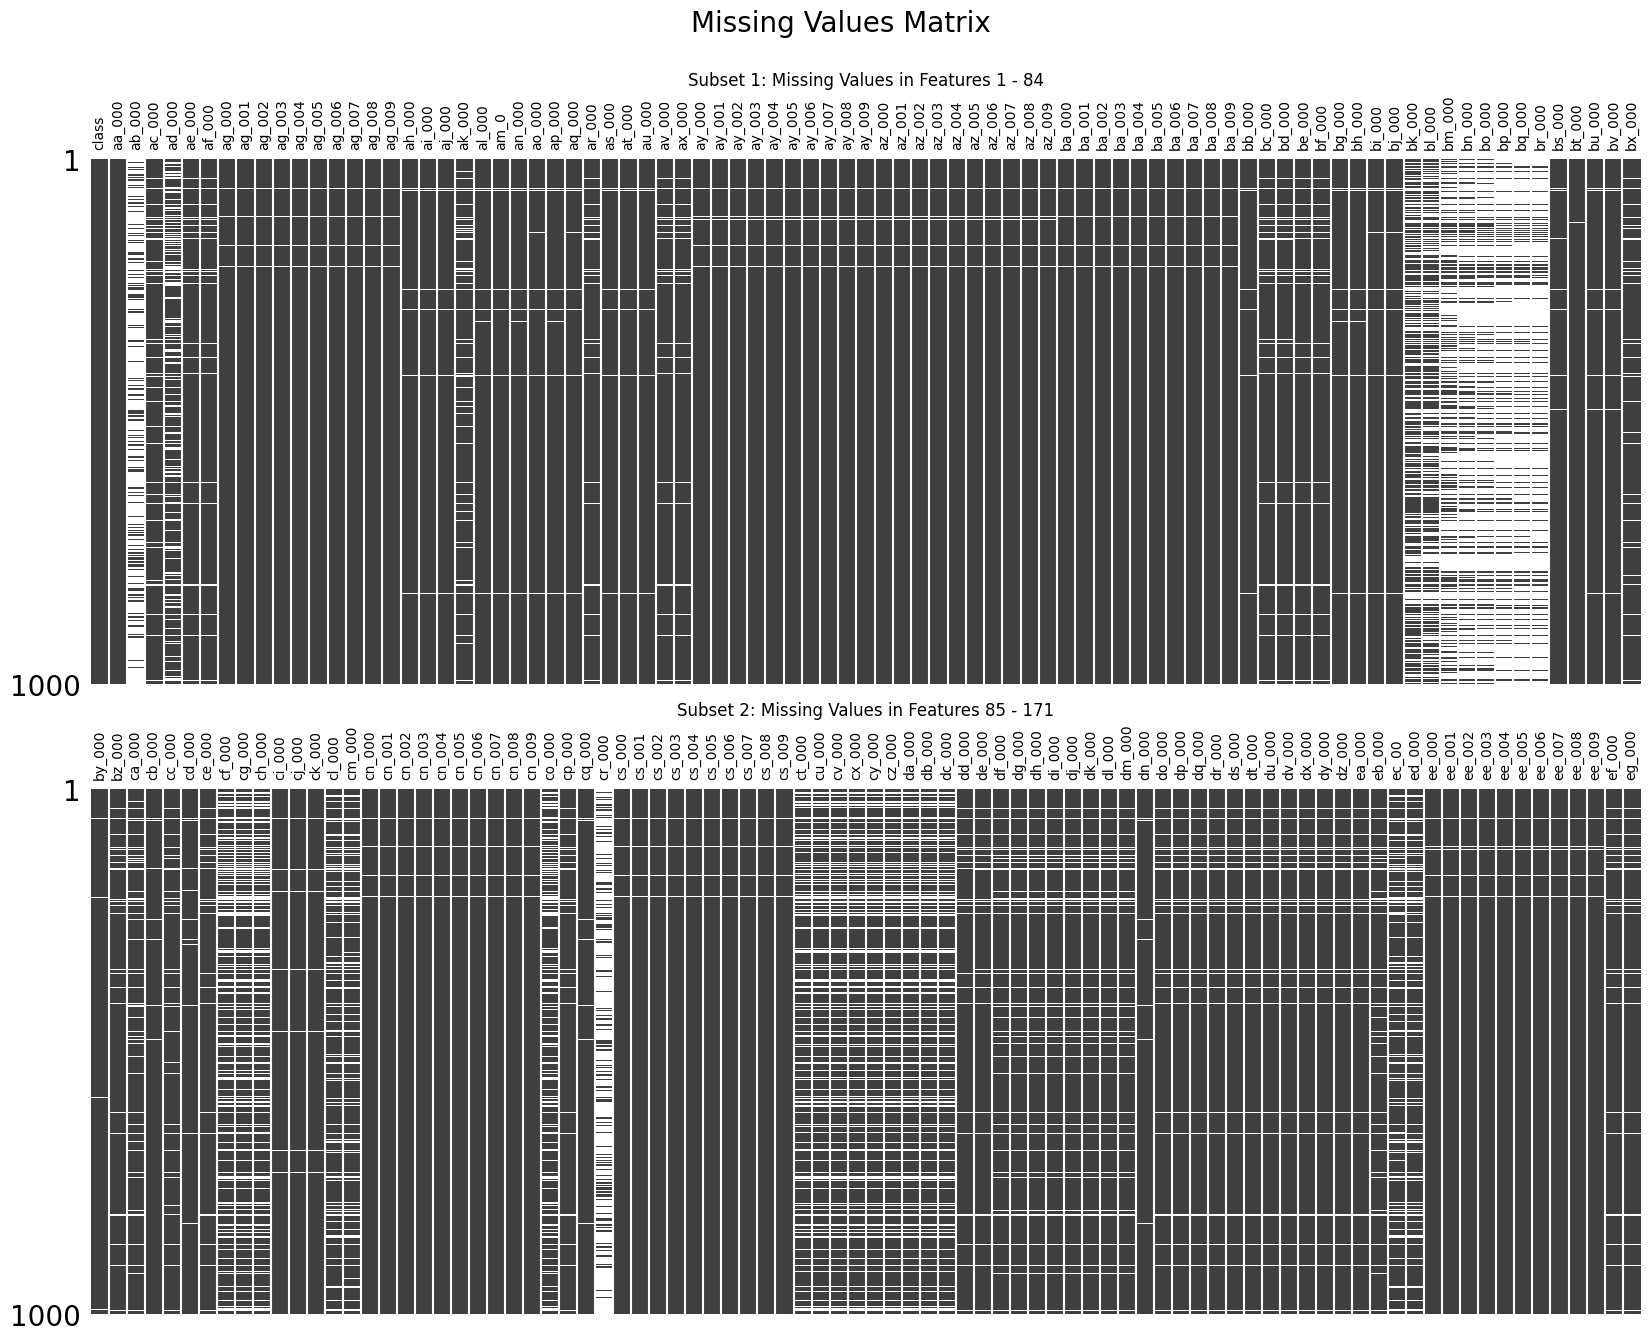

In [33]:
missing_values_vis(df, 1000)

<b>Missing values per "class" variable

Different patterns of missing values can be seen when the missing value matrix are split into the two different values of the "class" variable.

It might hint that they are related to the different states of "class". 

Bands could represent failings on the same part? They were labelled "na" specifically? Perhaps there are other "sensors" that "fail" before the missing values give no reading, or other indicator variables that

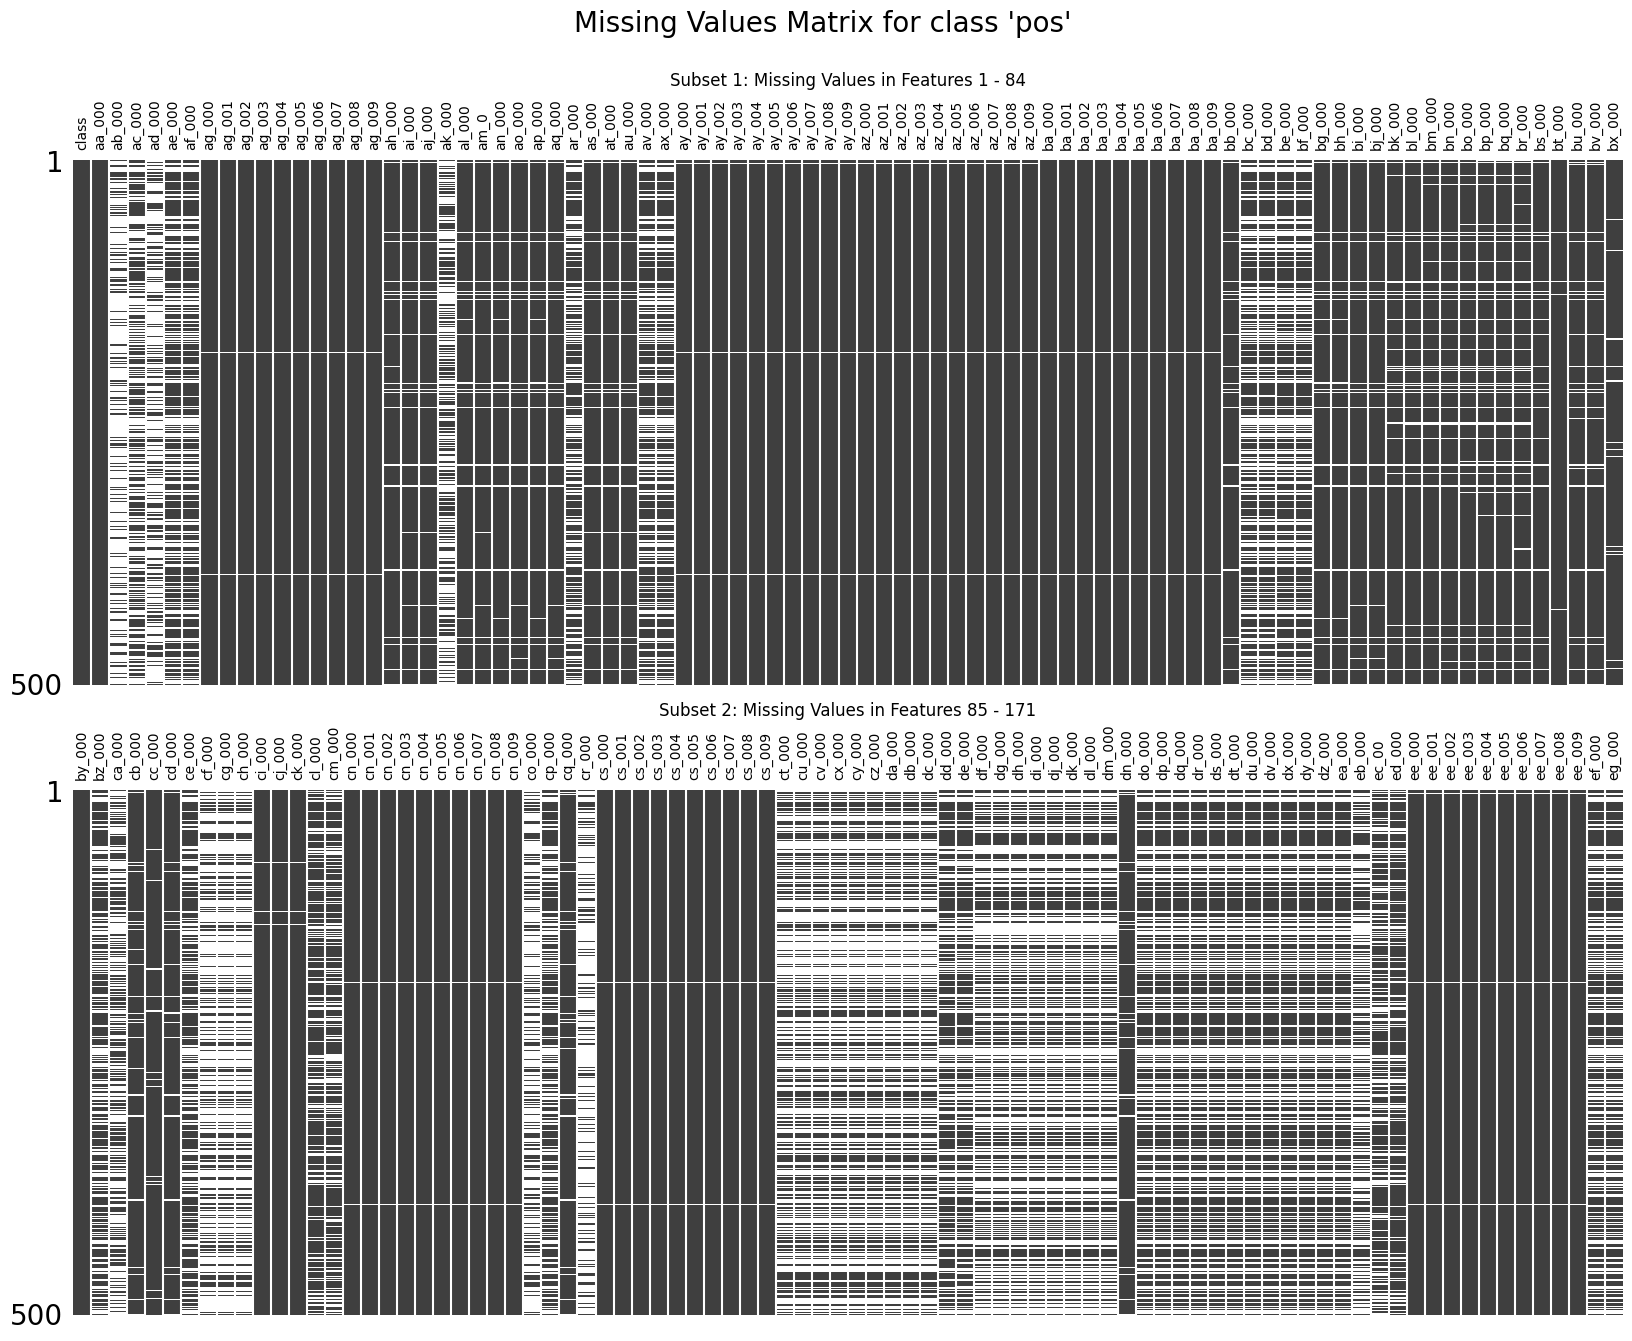

In [34]:
df1 = df[df["class"]=="pos"]
missing_values_vis(df1, 500, "Missing Values Matrix for class 'pos'")

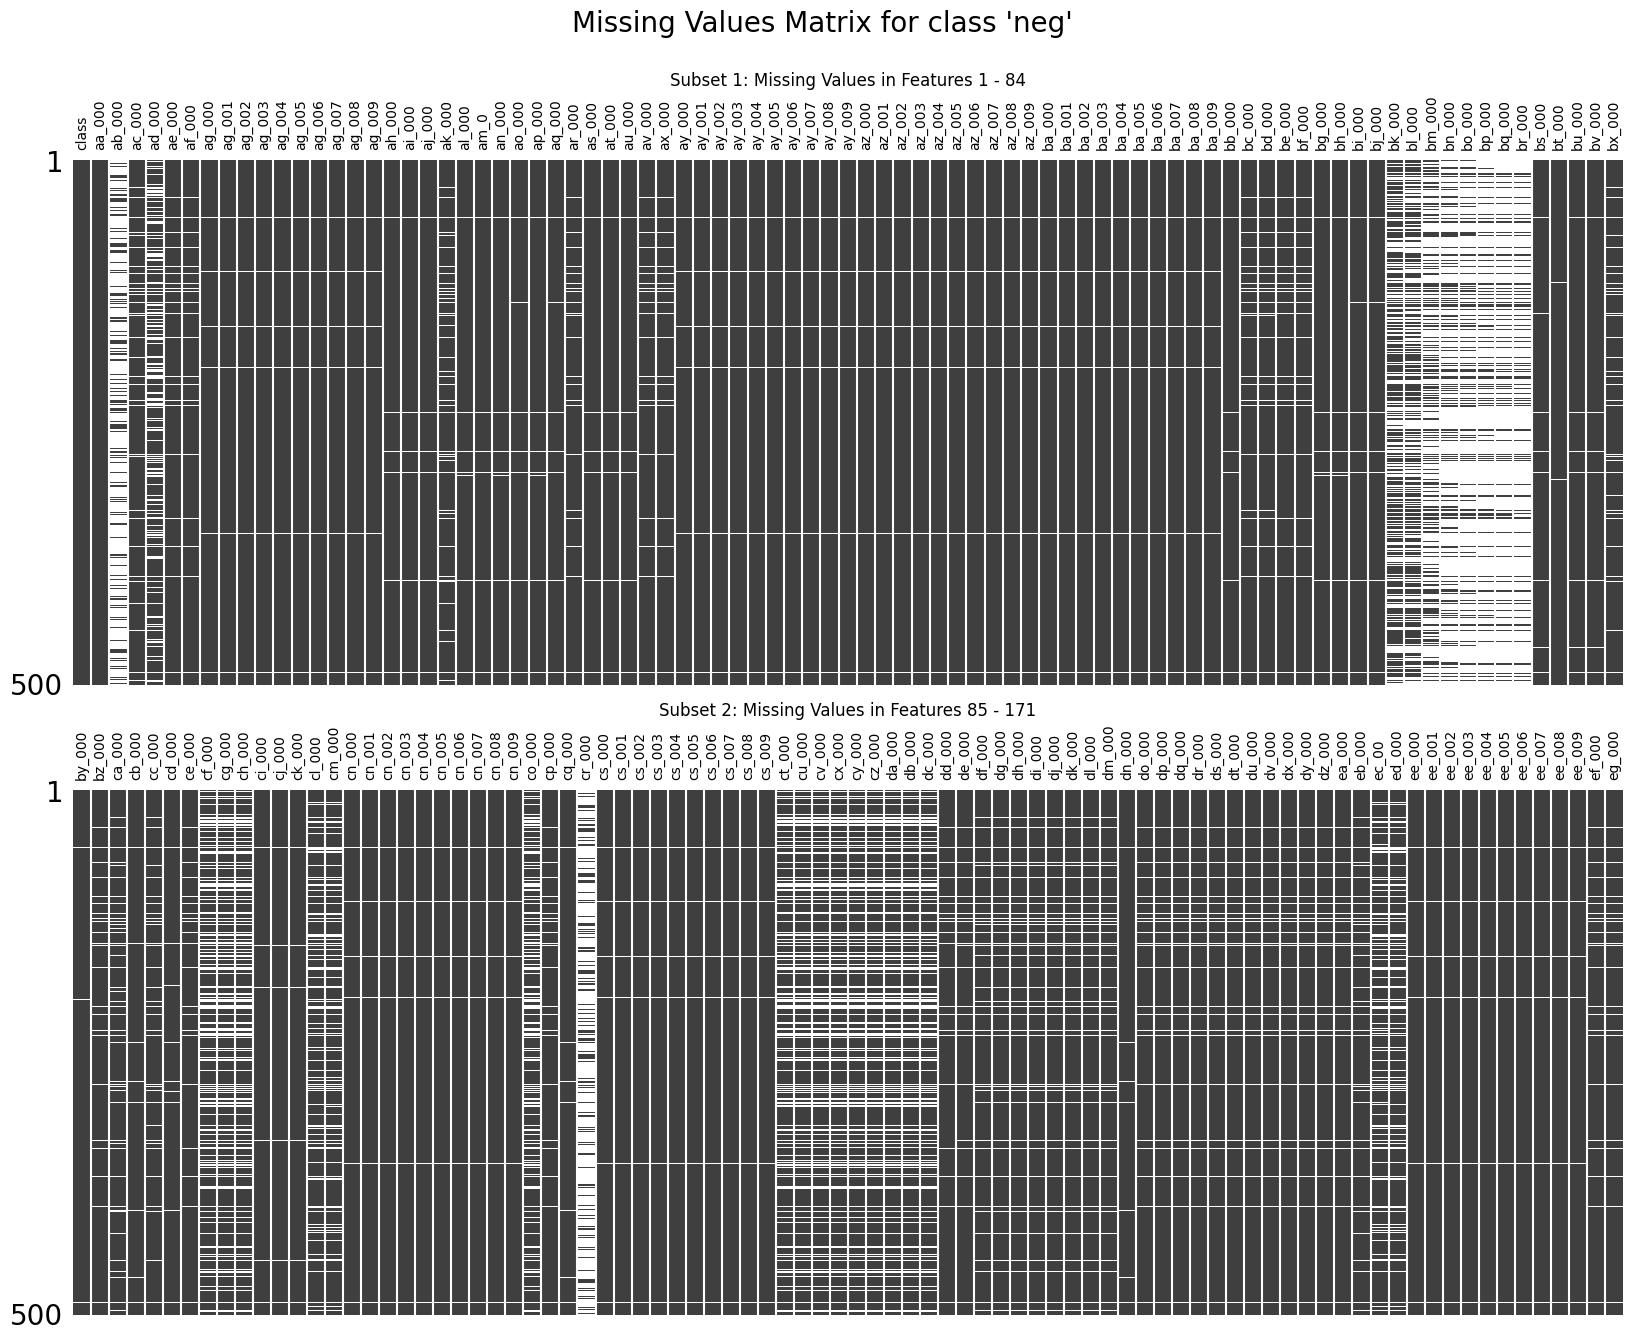

In [35]:
df1 = df[df["class"]=="neg"]
missing_values_vis(df1, 500, "Missing Values Matrix for class 'neg'")

<b> Duplicates

Although their seems like considerable pattern to the null data, there are no duplicated rows in the dataset.

In [36]:
df_no_duplicates = df.drop_duplicates()

print(f"Original dataframe shape: {df.shape}")
print(f"Dropped dataframe shape: {df_no_duplicates.shape}")

Original dataframe shape: (60000, 171)
Dropped dataframe shape: (60000, 171)


<b>Features with the highest missing data

From the missing plots above, it's clear that there is some relationship between data being missing and and the features, with bands of missing data stretching across multiple features that seem to be grouped by the same 'prefix' (cs_000, cs_001, cs_002 etc).

It looks like some bands of missing data stretch across all features, although the visualisation is split and 500 features are shown, so to be sure it's checked below, and no rows contain all missing data.



In [37]:
rows_with_all_missing = df[df.isna().all(axis=1)]

rows_with_all_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 0.0+ bytes


In [38]:
missing_counts = df.isnull().sum()
sorted_columns = missing_counts.sort_values(ascending=False)
print(sorted_columns)

br_000    49264
bq_000    48722
bp_000    47740
bo_000    46333
ab_000    46329
          ...  
cj_000      338
ci_000      338
bt_000      167
aa_000        0
class         0
Length: 171, dtype: int64


<b>Missing data percentage

In [39]:
missing_counts = missing_counts/60000 * 100

In [40]:
missing_counts

class      0.000000
aa_000     0.000000
ab_000    77.215000
ac_000     5.558333
ad_000    24.768333
            ...    
ee_007     1.118333
ee_008     1.118333
ee_009     1.118333
ef_000     4.540000
eg_000     4.538333
Length: 171, dtype: float64

In [41]:
missing_counts = pd.DataFrame(missing_counts, columns=["percent_missing"])

In [42]:
missing_counts

,percent_missing
class,0.000000
aa_000,0.000000
ab_000,77.215000
ac_000,5.558333
ad_000,24.768333
...,...
ee_007,1.118333
ee_008,1.118333
ee_009,1.118333
ef_000,4.540000


In [43]:

missing_data = missing_counts['percent_missing']

bin_edges = [-1, 0.001, 20, 40, 60, 80, 100]  
binned_data_labels = ['0%', '0.001-20%', '20-40%', '40-60%', '60-80%', '80-100%']

binned_data = pd.DataFrame()
# Bin the data and convert to string
binned_data['bins'] = pd.cut(missing_counts["percent_missing"], bins=bin_edges, labels=binned_data_labels)#.astype(str)


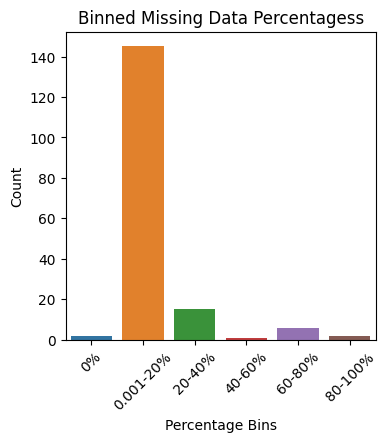

In [44]:
countplot(binned_data, "bins", title="Binned Missing Data Percentagess",
         x_label="Percentage Bins", rotate_xticks=45)

In [45]:
df1 =df.drop("class", axis=1)

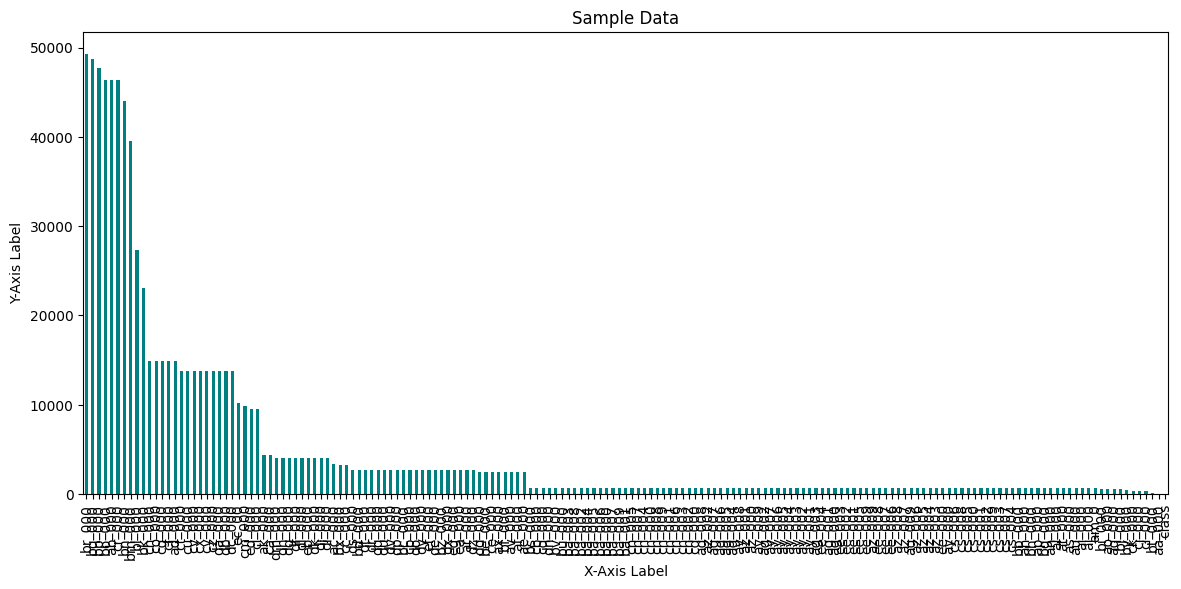

In [46]:
plt.figure(figsize=(14, 6))

sorted_columns.plot(
    kind='bar',        
    title='Sample Data', 
    xlabel='X-Axis Label', 
    ylabel='Y-Axis Label',
    color='teal'       
)


plt.show()

<b> Percentage of entries that are zero in the non null entries

There is a correlation between the amount of null values and the remaining percentage of values that will be zero (or non-zero, which would be the inverse relationship 1 - P ).

There could be lots of things to look at here but the important point is that the null values have relation to the non null values.

A line of best fit was drawn but when looking at the data there seems to be pattern to the outliers. One line of thought could be that the two lines represent the different states of class, but when the data is plotted for this it shows that the outliers persist for both values.

It does suggest that further exploration into clustering analysis would be worthwhile.

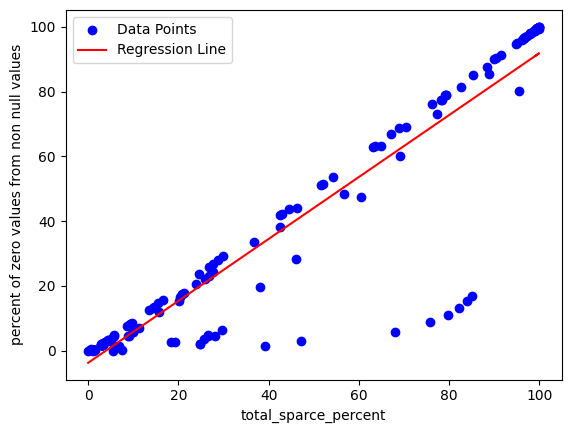

In [47]:
# add title param to this plot
sparse_lr(sparse_df, "total_sparce_percent", "percent of zero values from non null values")

In [48]:
df1 = df[df["class"] == "neg"]
sparse_df1 = make_sparse_df(df1)

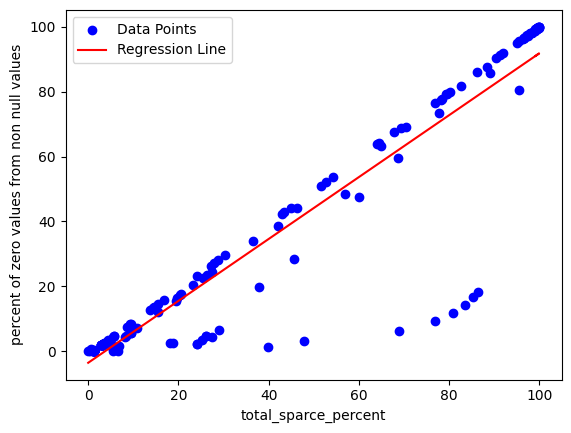

In [49]:
sparse_lr(sparse_df1, "total_sparce_percent", "percent of zero values from non null values")

In [50]:
df1 = df[df["class"] == "pos"]
sparse_df2 = make_sparse_df(df1)

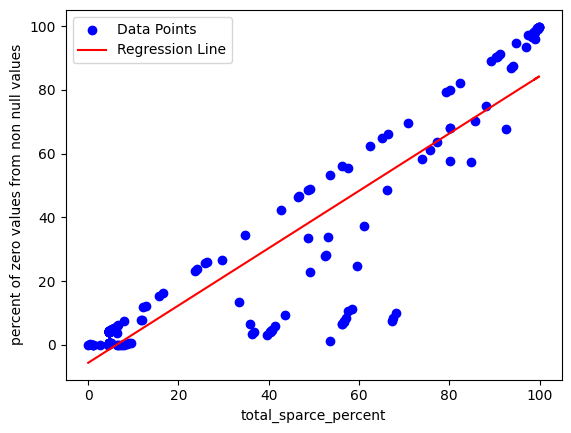

In [51]:
sparse_lr(sparse_df2, "total_sparce_percent", "percent of zero values from non null values")

<b>Separating the aparant outliers

A bubble plot is a scatter plot of circles where the area size of the circle indicates a third variable (Upton & Cook). Using matplotlib we can use colour to indicate a fourth.

For the 'neg' values; the more null values in a feature, the more it deviates from a linear increase in zero percentages (which is the inverse of having a non zero numerical number). 

That is there appears to be two groupings; the higher percentage of null values a feature then it is likely to follow a linear relationship with the amount of zeros in the data, or, features with high percentage of null values have va lower percentage of values that are zero.

And in these groupings there is very little in between

In [52]:
sparse_df

,total entries,total_zeros,zero_percentages,total_null,null_percentages,total_sparce_percent,non_null_percentage,percent of zero values from non null values
class,60000,0,0.000000,0,0.000000,0.000000,100.000000,0.000000
aa_000,60000,393,0.655000,0,0.000000,0.655000,100.000000,0.655000
ab_000,60000,10977,18.295000,46329,77.215000,95.510000,22.785000,80.294053
ac_000,60000,8752,14.586667,3335,5.558333,20.145000,94.441667,15.445160
ad_000,60000,2009,3.348333,14861,24.768333,28.116667,75.231667,4.450697
...,...,...,...,...,...,...,...,...
ee_007,60000,7898,13.163333,671,1.118333,14.281667,98.881667,13.312208
ee_008,60000,17280,28.800000,671,1.118333,29.918333,98.881667,29.125723
ee_009,60000,31863,53.105000,671,1.118333,54.223333,98.881667,53.705608
ef_000,60000,57021,95.035000,2724,4.540000,99.575000,95.460000,99.554787


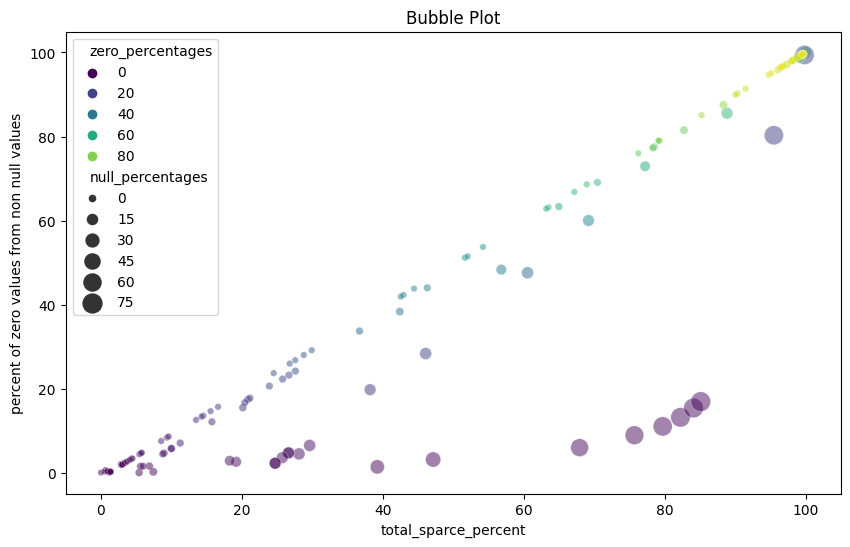

In [53]:
sparse_bubble_plot(sparse_df)

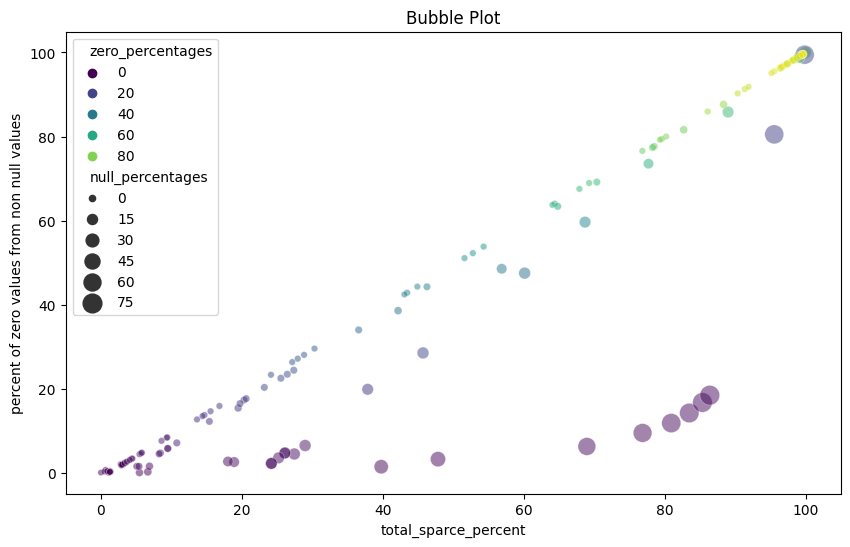

In [54]:
sparse_bubble_plot(sparse_df1)

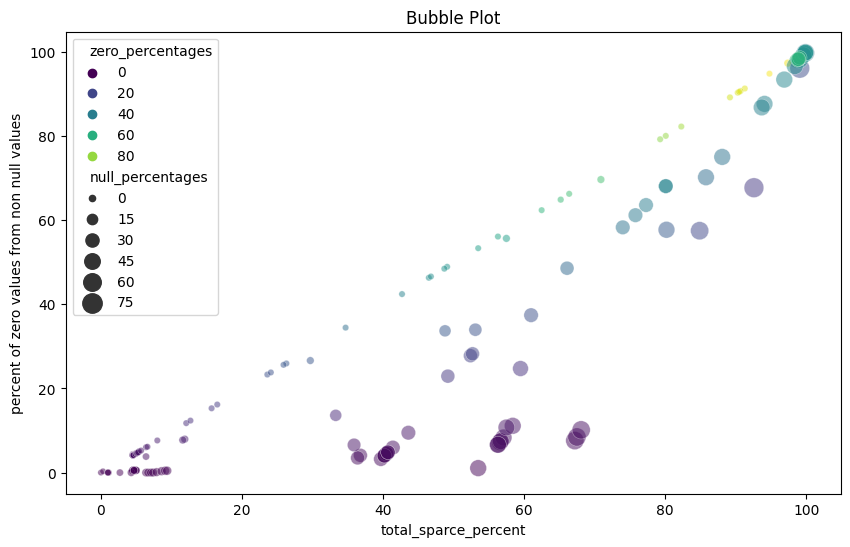

In [55]:
sparse_bubble_plot(sparse_df2)

<b>Colouring by prefix

We can see that encoding for prefix that the band of outliers corresponds to a band of features in the dataset. When the data is coloured by the first letter in the prefix more apparant bands or clusters appear.

In [56]:
sparse_df.index

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [57]:
index_prefix = sparse_df.index.str.split('_').str[0]
sparse_df['index_prefix'] = index_prefix

In [58]:
sparse_df

,total entries,total_zeros,zero_percentages,total_null,null_percentages,total_sparce_percent,non_null_percentage,percent of zero values from non null values,index_prefix
class,60000,0,0.000000,0,0.000000,0.000000,100.000000,0.000000,class
aa_000,60000,393,0.655000,0,0.000000,0.655000,100.000000,0.655000,aa
ab_000,60000,10977,18.295000,46329,77.215000,95.510000,22.785000,80.294053,ab
ac_000,60000,8752,14.586667,3335,5.558333,20.145000,94.441667,15.445160,ac
ad_000,60000,2009,3.348333,14861,24.768333,28.116667,75.231667,4.450697,ad
...,...,...,...,...,...,...,...,...,...
ee_007,60000,7898,13.163333,671,1.118333,14.281667,98.881667,13.312208,ee
ee_008,60000,17280,28.800000,671,1.118333,29.918333,98.881667,29.125723,ee
ee_009,60000,31863,53.105000,671,1.118333,54.223333,98.881667,53.705608,ee
ef_000,60000,57021,95.035000,2724,4.540000,99.575000,95.460000,99.554787,ef


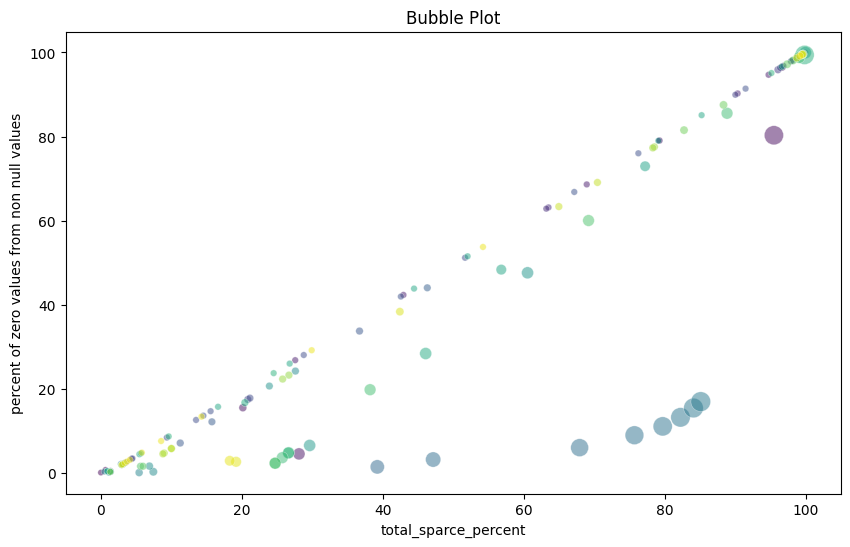

In [59]:
sparse_bubble_plot(sparse_df, c="index_prefix", legend=False)

In [60]:
first_letter = sparse_df['index_prefix'].str.get(0)
sparse_df['first_letter'] = first_letter

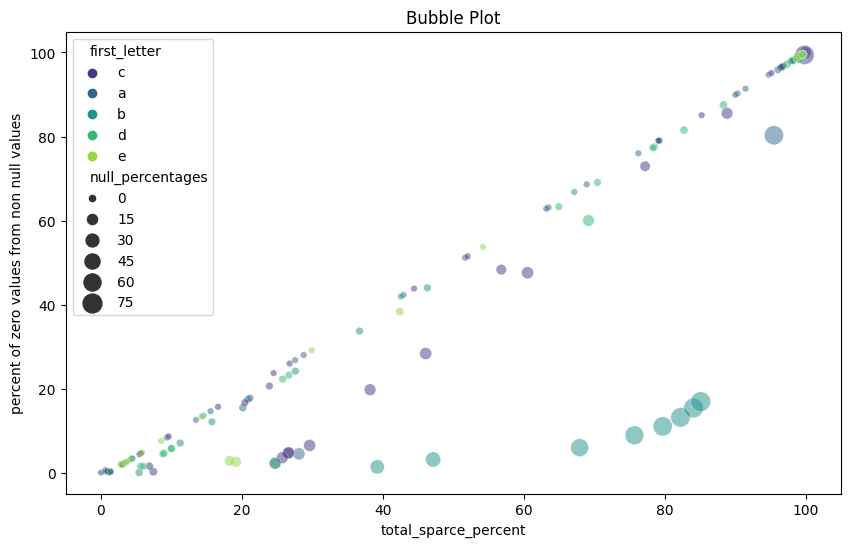

In [61]:
sparse_bubble_plot(sparse_df, c="first_letter")

<b> Chi-squared Test

A Chi-squared test is useful in analysing the proportions of categories to determine if there is a significat difference between the proportions (Rowntree, p. 153). The *class* feature is a binary category with two values; "neg" and "pos". A test of signicance can be done to verify the null hypothesis which states that there is no relationship between the missing values (for the feature that is tested) and the class variable.

It shows, as implied from the missing data visualisation, that there are certain null values associated with certain states of *class*. The contingency table below shows null values as True and non-null as False.

The p-value of 0.0 is significant and confirms the alternative hypothesis, and that there is a relationship between the missing data (of the feature tested) and values of *class.*

This does imply that there could be signal in if a value is missing or not, and could warrant more investigation.

In [62]:
contingency_table = pd.crosstab(df["br_000"].isnull(), df["class"])

chi2, p, dof, expected = chi2_contingency(contingency_table)

In [63]:
contingency_table

class,neg,pos
br_000,,
False,9826,910
True,49174,90


In [64]:
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-squared statistic: 3694.445556687854
p-value: 0.0
Degrees of freedom: 1
Expected frequencies: [[10557.06666667   178.93333333]
 [48442.93333333   821.06666667]]


<b> Chi-squared Test for all features with class

We can perform a chi-squared test for all the features and their relationship with 'class' fairly simple with python.

The results show that most missing data seems to be related to states of class, but the opposite fact is also true, that the non-missing data is also related to the states of class. Therfor to eliminate the data or rows with high percentage of missing data (Plot this) would be simplifing signal from the data.

perform same test but with differnt bandings... real number vs null+zero... etc...

In [65]:
df_class = df[["class"]]
#df_missing = df.iloc[:,72:81].isnull()
df_missing = df.iloc[:,1:].isnull()
df_missing = pd.concat([df_class, df_missing], axis=1)
df_missing.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,neg,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,neg,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [66]:
alpha =0.05

significant = 0
non_significant = 0

for feature in df_missing.columns[1:]:
    contingency_table = pd.crosstab(df_missing[feature], df_missing['class'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    #print(f"Chi-squared test for {feature}:")
    #print(f"Chi-squared statistic: {chi2}")
    #print(f"P-value: {p}")
    
    if p < alpha:
        #print(f"There is a significant association between {feature} and the 'Class' feature.")
        significant+= 1
    else:
        #print(f"There is no significant association between {feature} and the 'Class' feature.")
        non_significant+= 1
    #print("\n")

print(f"Confidence level of {(1.00-alpha)*100}%")
print(f"Significant relationship: {significant}")
print(f"Not Significant relationship: {non_significant}\n")


alpha =0.01

significant = 0
non_significant = 0

for feature in df_missing.columns[1:]:
    contingency_table = pd.crosstab(df_missing[feature], df_missing['class'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    #print(f"Chi-squared test for {feature}:")
    #print(f"Chi-squared statistic: {chi2}")
    #print(f"P-value: {p}")
    
    if p < alpha:
        #print(f"There is a significant association between {feature} and the 'Class' feature.")
        significant+= 1
    else:
        #print(f"There is no significant association between {feature} and the 'Class' feature.")
        non_significant+= 1
    #print("\n")

print(f"Confidence level of {(1.00-alpha)*100}%")
print(f"Significant relationship: {significant}")
print(f"Not Significant relationship: {non_significant}")

Confidence level of 95.0%
Significant relationship: 134
Not Significant relationship: 36

Confidence level of 99.0%
Significant relationship: 93
Not Significant relationship: 77


<b>Bands of missing data

In [67]:
print(df.iloc[:,79:100].columns)

Index(['br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000',
       'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000',
       'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000'],
      dtype='object')


In [68]:
df1.iloc[:,72:80].head()

,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000
9,263620.0,263960.0,253220.0,260500.0,270840.0,NaN,NaN,NaN
23,366980.0,314860.0,176220.0,232680.0,162300.0,189300.0,187600.0,189400.0
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,360880.0,360780.0,362340.0,312140.0,332700.0,301160.0,357580.0,399320.0
135,319980.0,347260.0,326760.0,342440.0,289980.0,277580.0,288080.0,265480.0


<b>Examing Bands of data

Until now we have looked at patterns in the missing data, and used that to make deductions about the zero or real numbers that would be in the data. And that we'd expect different null values to appear for different values of class.

But that has left some questions; on how to deal with the missing data? what is the relationship in outliers? 

We have looked at variablity measures to get an idea of the scale of the data and outliers in the data, and while we have looked at bands of missing data, and the next logical step is to look the bands of numbers and see if there is suspected pattern in the bands. And when we do that we see that there is..

So there is pattern/information that is stored in horizontal bands? possibly grouped/labelled with the aa, ab adjective groupings

Could be readings over time.. different sensor peaks?

Need to look at these per class and possibly per row.. look at the band of rows with high missing data.. what does the data look like there when it isn't missing.. does it follow the pattern of higher missing = more numbers or more zeros... if is more zeros what are those rows doing and could they be dummy encoded for missing and non missing

In [69]:
df1 = df.drop("class", axis=1)

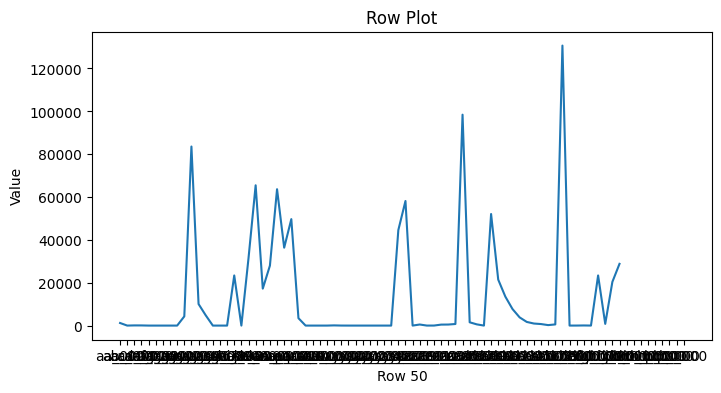

In [70]:
x = 50

row = df1.iloc[x, :80]

plt.figure(figsize=(8, 4))
plt.plot(row)

plt.xlabel(f"Row {x}")
plt.ylabel("Value")
plt.title("Row Plot")
plt.show()


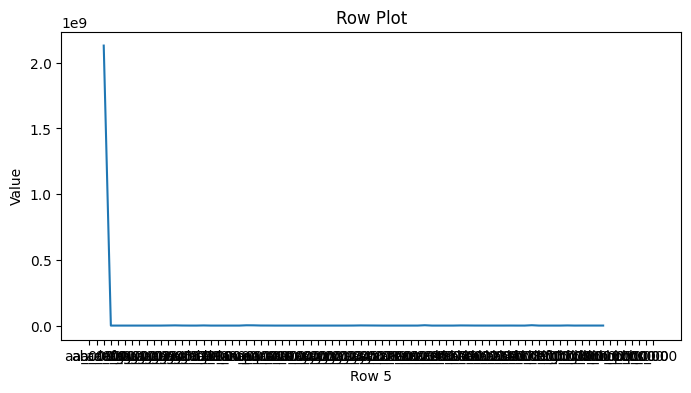

In [71]:
x = 5

row = df1.iloc[x, :80]

plt.figure(figsize=(8, 4))
plt.plot(row)

plt.xlabel(f"Row {x}")
plt.ylabel("Value")
plt.title("Row Plot")
plt.show()


<b>3.4 Feature Count

The above statistical view only shows a snapshot of information from the total features. 

Issues with the above statisticall analysis.. too much information.. some standard methods unsuable, pairplot etc.
Are their ways we can make statements about the data?

<b>Missing data not at random

The analysis shows that the missing data isn't at random. 
This is supported by a few facts.
1. The general pattern of the missing data when looking at a missing data matrix, which seems to outline missing data in 'bands'.
2. The missing data is clustered into different outlined relationships with zero or real number values.
3. The chi-squared test also shows that most features with missing data is related to class values.
4. The 'bands' of data are ....

Furthermore, as data missing does not stop the classification of the failure being 'neg' or 'pos', it seems as if it has some signal within the data. And as there are 'bands' of related features it makes this dataset prime for using dimensionality reduction to understand these features better, and at this stage we might suspect that each band of data can be condensed somewhat, even before considering the larger pattern in the data.

This brings us to two things; feature extraction and imputation.

<b> Feature Extraction

While we have performed data mining already, they have been used in a transposed dataframe to understand the features. Now we may want to encode in the data attributes about the 'band' of that for that class; null, zero, or real number. This is signal that could be lost during imputation. When performing dimensionality reduction we could find out just how important the missing data is to the data itself.

In [72]:
df.dfdg

AttributeError: 'DataFrame' object has no attribute 'dfdg'

<b>Imputation

There are different imputations that can be performed on the data, and we will discuss two.

One line of thought could be to imputate with the mean which could have uses for principal component analysis, it's not adding variance to influence the features and as we have the bands encoding?

Perhaps though, a more sophisticated method of multiple imputation can be employed.

In [ ]:
# using mean for now but look into what makes most sense
# mean makes somewhat sense but does it take the data out of a sort of binary; number or sparse
numeric_cols = df.select_dtypes(include=[np.number]).columns
Imputation_mean = pd.DataFrame(columns=numeric_cols)
Imputation_mean = df[numeric_cols].fillna(df[numeric_cols].mean())

In [ ]:
Imputation_mean.head()

<b>Scaling Data

The data is scaled with standardisation to have unit variance of the features (Müller & Guido, p. 135). Standardisation is also a good choice given that firstly, there is considerable sparce data, and secondly there are outliers. Min-Max scalar would map the outliers to 1, and *'crush'* the smaller values to low decimals (Gérom, p. 76).

In [ ]:
scaler = StandardScaler()

In [ ]:
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
df.head()

<b>Dimensionality Reduction

<b>Principal Component Analysis

Performing PCA with two components is useful for visualisaton.

how comparable is a binary matrix of 1 was null, 0 was a number with the pca performed

In [ ]:
pca = PCA(n_components=2)

In [ ]:
df = df.drop(columns="class")

In [ ]:
principal_components = pca.fit_transform(df)

In [ ]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

In [ ]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [ ]:
pca = PCA(n_components=50)

In [ ]:
principal_components = pca.fit_transform(df)

In [ ]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

<b>Conclusion

<b>References

Géron, A. (2022) *Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow* Sebastopol: O'Reilly Media, Inc.

Harrison, M. (2019) *Machine Learning Pocket Reference* Sebastopol: O'Reilly Media, Inc.

Müller & Guido (2019) *Introduction to Machine Learning with Python* Sebastopol: O'Reilly Media, Inc.

Rowntree, D. (2018) *Statistics without Tears: An Introduction for Non-Mathematicians.* Great Britain: Penguin Books

Spiegelhalter, D. (2019) *The Art of Statistics: Learning from Data.* Great Britain: Penguin Books

Upton & Cook (2014) *A Dictionary of Statistics.* United Kingdom: Oxford University Press